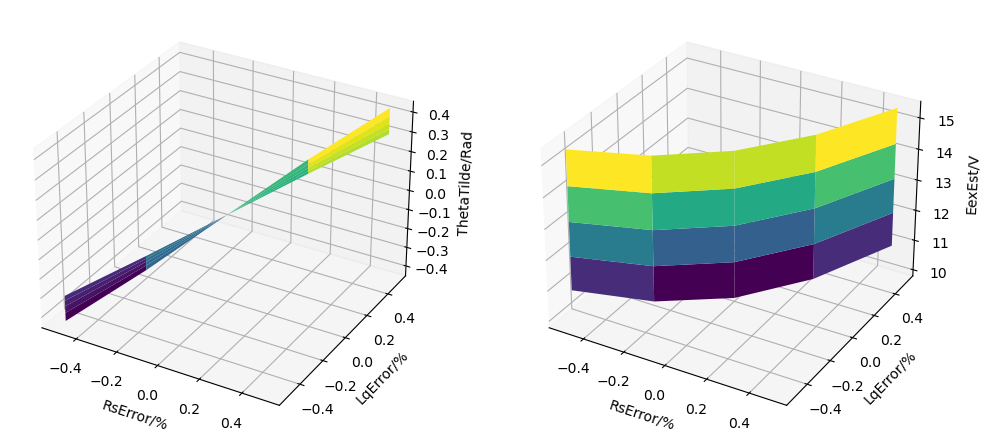

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assumed machine operated condition
# gammaRated = np.pi / 6
gammaRated = 0
IsRated = 8
RsRated = 0.6
LdRated = 2.7e-3
LqRated = 4.4e-3
IqRated = 8 * np.cos(gammaRated)
IdRated = -8 * np.sin(gammaRated)
weRated = (500 * 5 / 60) * 2 * np.pi
PsiDM = 0.047
EexRated = weRated * PsiDM + (LdRated - LqRated) * (weRated * IdRated)

# Create arrays for RsError and LqError
RsError = np.arange(-0.5, 0.6, 0.25) * RsRated
LqError = np.arange(-0.5, 0.6, 0.25) * LqRated

# Initialize arrays for EexError and ThetaError
EexError = np.zeros((5, 5))
ThetaError = np.zeros((5, 5))

# Calculate EexError and ThetaError for different RsError and LqError values
for i in range(5):
    for j in range(5):
        TempA = EexRated * np.cos(gammaRated) - RsError[i] * IsRated
        TempB = EexRated * np.sin(gammaRated) + weRated * LqError[j] * IsRated
        EexError[i, j] = np.sqrt(TempA**2 + TempB**2)
        ThetaError[i, j] = np.arctan2(TempB, TempA) - gammaRated
        if ThetaError[i, j] + gammaRated > np.pi/2 or ThetaError[i, j] + gammaRated < -np.pi/2:
            EexError[i, j] = -EexError[i, j]

# Create a 3D plot for ThetaError
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(RsError/RsRated, LqError/LqRated, ThetaError, cmap='viridis')
ax1.set_xlabel("RsError/%")
ax1.set_ylabel("LqError/%")
ax1.set_zlabel("ThetaTilde/Rad")
# ax1.view_init(elev=20, azim=-130)

# Create a 3D plot for EexError
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(RsError/RsRated, LqError/LqRated, EexError, cmap='viridis')
ax2.set_xlabel("RsError/%")
ax2.set_ylabel("LqError/%")
ax2.set_zlabel("EexEst/V")
# ax2.view_init(elev=20, azim=-130)

plt.show()
